<a href="https://colab.research.google.com/github/justinb4003/4003colab/blob/main/205_Lab_3_polynomial_regression(students).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Polynomial regression

This lab will be due by midnight on **Monday, October 16**.  Please be sure to make a copy of this notebook, save your notebook when your work is complete (Ctrl + S or look under the File menu), and print the file to PDF. Each student in your group should upload the PDF to Blackboard in the usual way. The original version of this file can be found at http://gvsu.edu/s/289.

The lab will be marked on a scale of 25 points; the points for each question are noted in the header of each of the 4 problems.

Please double click here and enter the names of everyone in your group.

**Names:** Ben, Justin, Mandy

As usual, evaluate the following cell to get started.  This loads some data and provides some convenient commands.  Some things to remember:

1.   <code>onesvec(124)</code> gives a 124-dimensional vector whose entries are all one.
2.   <code>v.norm()</code> gives the length of a vector and <code>v.demean()</code> returns the demeaned vector.
3.   Remember the transpose when you define a matrix using a list of vectors: <code>matrix([v1, v2, v3]).T</code>
4.   <code>Q, R = A.QR()</code> gives you the $QR$ factorization of $A$.
5.   <code>a**2</code> gives you the square of a number $a$.

In [32]:
!rm -rf mth205/
!mkdir -p mth205
!git clone https://github.com/davidaustinm/MTH205-W20.git mth205/
import sys
sys.path.append('/content/mth205/libs')
from mth205 import *
from math import *
import numpy as np
import pandas as pd

Cloning into 'mth205'...
remote: Enumerating objects: 637, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 637 (delta 57), reused 108 (delta 36), pack-reused 491
Receiving objects: 100% (637/637), 659.82 KiB | 925.00 KiB/s, done.
Resolving deltas: 100% (251/251), done.


## Problem 1 - 10 points (there are 6 prompts (each noted by "*"), and the points for them correspond to the number that follows in square brackets, such as "[2]")

Recently, we've fit a linear function, either of the form $b + mx=y$ or, more generally,
$$\beta_0+\beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n=y,$$
to a few given datasets.

The techniques we've developed so far can also be used to fit a polynomial to a set of data:  

$$\beta_0+\beta_1x + \beta_2x^2 + \beta_3x^3 + \ldots + \beta_nx^n=y,$$

Evaluating the following cell will load in some data, which can be plotted using the cell right after it.

In [33]:
df = pd.read_csv('/content/mth205/data/poly_data.csv')
data = [vector(row) for row in df.values]
df

,x,y
0,0,2
1,1,1
2,2,3
3,3,3


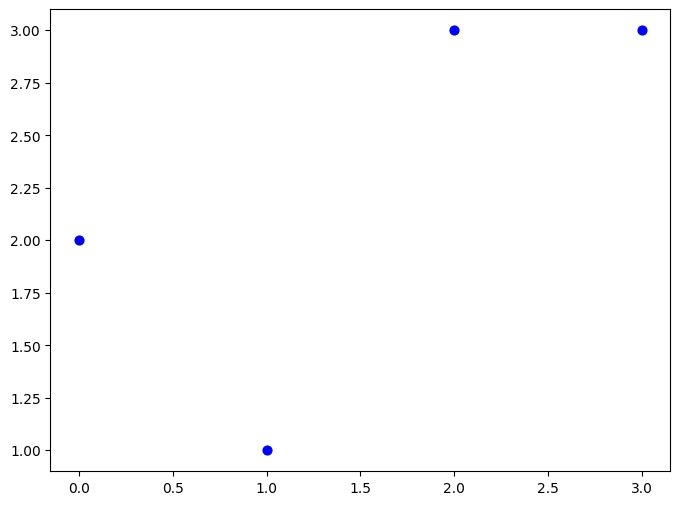

In [34]:
list_plot(data, color='blue', size=40)

Fitting a linear function of the form $y=b + mx$ doesn't look like such a good idea.  Perhaps we could try a quadratic function of the form
$$
\beta_0 + \beta_1 x + \beta_2 x^2 = y.
$$

*[2] Define a matrix $A$ and vector ${\mathbf b}$ so that the solution $A{\mathbf x} = {\mathbf b}$ describes ${\mathbf x} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix}$.

In [48]:
A = matrix([
    [1, 0, 0],
    [1, 1, 1],
    [1, 2, 4],
    [1, 3, 9],
])

b = vector((2, 1, 3, 3))

*[2] Now find the $QR$ factorization of $A$ and use it to find the least squares approximate solution $\widehat{\mathbf x}$.  Call your least squares solution <code>xhat</code>.

In [51]:
Q, R = A.QR()
P = Q*Q.T
bhat = P*b

xhat = R.inverse()*Q.T*b
xhat



[ 1.75 -0.25  0.25]

You can plot your approximation along with the data using the following cell.

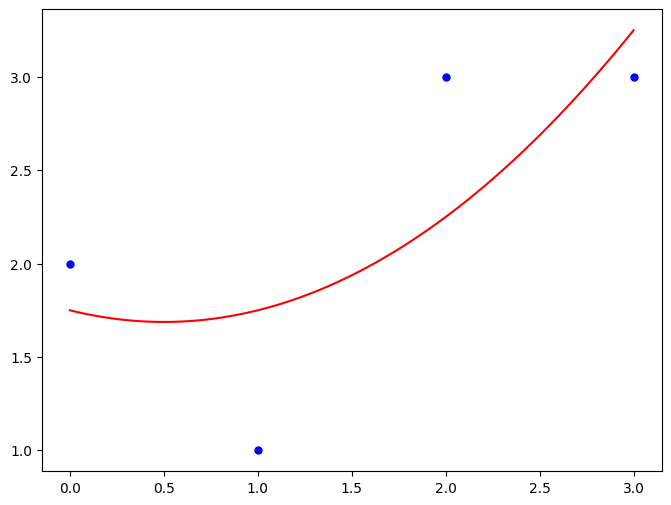

In [52]:
plot_model(xhat, data)

*[1] When $x=1.5$, what does your model predict for the value of $y$?

In [54]:
A*xhat

[1.75 1.75 2.25 3.25]

Find the coefficient of determination $R^2$ for this model.

In [56]:
num = (b-A*xhat).norm()**2
denom = b.demean().norm()**2
r = 1 - (num/denom)
r

0.5454545454545454

*[2] Now, suppose that we instead want to fit a cubic function to the data:

$$
y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3.
$$
Find the least squares approximate solution $\widehat{\mathbf x}$.



In [57]:
A = matrix([
    [1, 0, 0, 0],
    [1, 1, 1, 1],
    [1, 2, 4, 8],
    [1, 3, 9, 27],
])

b = vector((2, 1, 3, 3))

Q, R = A.QR()
P = Q*Q.T
bhat = P*b

S = A.augment(bhat).rref()
print(S)
xhat = vector((2, -4.1666, 4, -0.83333))

[[ 1.          0.          0.          0.          2.        ]
 [ 0.          1.          0.          0.         -4.16666667]
 [ 0.          0.          1.          0.          4.        ]
 [ 0.          0.          0.          1.         -0.83333333]]


*[1] Find the coefficient of determination $R^2$.

In [60]:
num = (b-A*xhat).norm()**2
denom = b.demean().norm()**2
r = 1 - (num/denom)
r


0.9999999583272727

Plot your model and the data below.

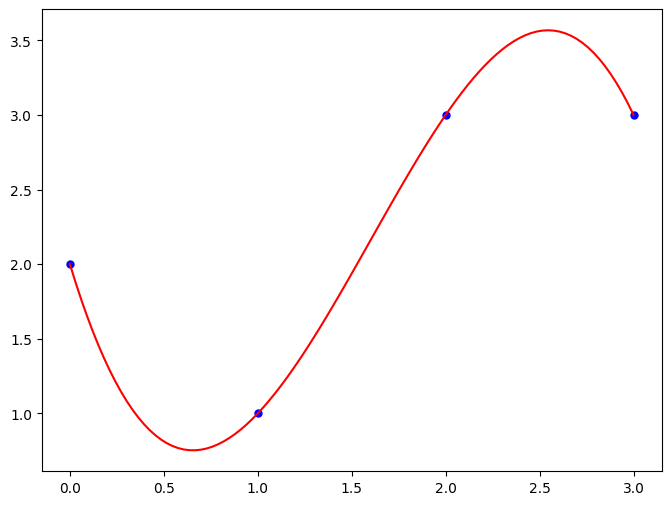

In [59]:
plot_model(xhat, data)

*[2] What do you notice about the fit of your cubic model?  How is this reflected in the value of $R^2$.

## Problem 2 - 15 points (prompts at *, point values noted in square brackets, such as "[4]")

Understanding climate change is a fundamental problem of our age. Given below is some data describing the extent of Arctic sea ice, measured in millions of square kilometers, by month of the year. Data is given for 1980 and 2012. The following cells provide the data and plots the 1980 data.  The 1980 sea ice data is contained in the vector <code>ice_1980</code> while the 2012 data is in the vector <code>ice_2012</code>; the vector containing the months of the year is <code>month</code>.  (This dataset comes from [Sustainability Math](http://sustainabilitymath.org/).)   Be sure to execute both cells below.

In [61]:
df = pd.read_csv('/content/mth205/data/sea_ice.csv')
df = df[['Month', '1980', '2012']]
data_1980 = [vector(row) for row in df.values[:, :2]]
data_2012 = [vector(row) for row in df.values[:, [0,2]]]
month = vector(df['Month'])
ice_1980 = vector(df['1980'])
ice_2012 = vector(df['2012'])
df

,Month,1980,2012
0,1.0,14.86,13.73
1,2.0,15.96,14.55
2,3.0,16.04,15.20
3,4.0,15.43,14.63
4,5.0,13.79,13.01
5,6.0,12.20,10.67
6,7.0,10.10,7.67
7,8.0,7.98,4.72
8,9.0,7.67,3.57
9,10.0,9.18,5.89


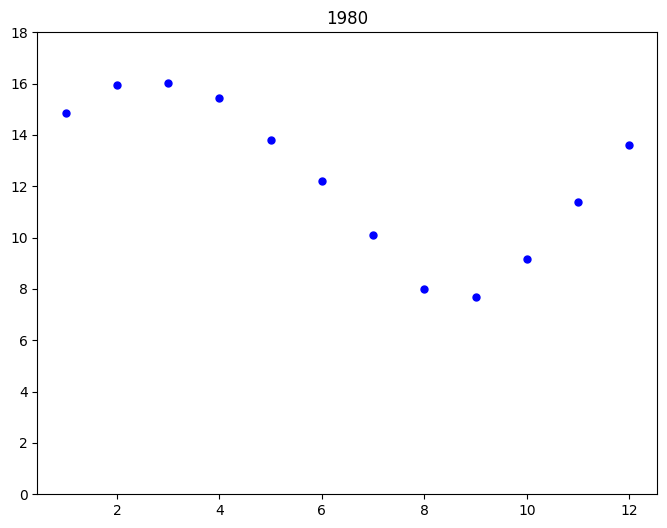

In [62]:
list_plot(data_1980, title='1980', ylim=(0,18))

We will look at fitting various polynomials of degree $k$ to the data:

$$
y = \beta_0+\beta_1x + \beta_2x^2 + \ldots + \beta_kx^k.
$$

Because people do this a lot, there is a way to automate the formation of the matrix
$$
A =
\begin{bmatrix}
1 & x_1 & x_1^2 & \ldots & x_1
^k \\
1 & x_2 & x_2^2 & \ldots & x_2^k \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \ldots & x_m^k \\
\end{bmatrix}.
$$
This matrix is called the *Vandermonde* matrix and you can obtain it with the command
<code>vandermonde(x, k)</code> where <code>x</code> is the vector of $x$-coordinates and $k$ is the degree of the polynomial.

*[4] Begin by fitting a polynomial of degree 5 to the 1980 data.  To accomplish this, you will need to do the following:
  + identify the matrix $A$, which is a *Vandermonde* matrix
  + identify the vector $\mathbf{b}$ for which we want to solve $A \mathbf{x} = \mathbf{b}$
  + find the least squares solution to $A \mathbf{x} = \mathbf{b}$ using our now-standard approach with the QR factorization
  + call your least-squares solution <code>xhat</code>


Plot your resulting model below by executing the given line of code.

In [ ]:
plot_model(xhat, data_1980, title='k = 5', ylim=(0,18))

*[1] Find the coefficient of determination $R^2$ for your model when $k=5$.

*[2] Next, fit a degree $k=8$ polynomial to the data and and plot the polynomial and data.



*[1] Find the coefficient of determination $R^2$ when $k=8$.

*[1] And finally, repeat with $k=11$.  

*[1] And find the coefficient of determination $R^2$.

It's certainly the case that higher degree polynomials fit the data better, as can be seen with the higher $R^2$ values, but that's not always a good thing.  For instance, when $k=11$, you may notice that the polynomial wiggles a little more than it seems like it should.  In this case, the polynomial is trying too hard to fit the data, and the data will usually have some errors in it, especially if it's obtained from measurements.  The error built in to the data is called *noise*, and acknowledging its presence means that we shouldn't expect our polynomial to fit the data perfectly.  When we choose a polynomial whose degree is too high, we give the noise too much weight in the model, which leads to some undesirable behavior, like the wiggles in the graph.

Adding parameters to a model increases the model's flexibility, but adding too many parameters makes the model too sensitive to noise.  This phenomenon is called *overfitting*.  

There are ways of determining the optimal value of $k$, but that is a topic beyond the scope of our course.

*[1] Choose a reasonable value of $k$ and estimate the extent of sea ice at month 6.5 of 1980.

Next, let's consider the 2012 data:

In [ ]:
list_plot(data_2012, title='2012', ylim=(0,18))

*[3] Choose a reasonable value of $k$ and find a polynomial of that degree that fits the data.  Plot your model along with the data, and find the coefficient of determination 𝑅2.

In [ ]:
plot_model(xhat, data_2012, title='k = ', ylim=(0,18))

*[1] Using your model, estimate the extent of sea ice at month 6.5 in 2012.